<a href="https://colab.research.google.com/github/Baroka-wp/dive_ML/blob/master/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam 
from sklearn.datasets import load_iris
from keras.datasets import mnist
from tensorflow.python.keras.layers import  Input, Embedding, Dot, Reshape, Dense
from tensorflow.python.keras.models import Model
from sklearn.preprocessing import OneHotEncoder

## [Problème 1] Partager et exécuter le modèle de tutoriel officiel


#### Charger les donnêes


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


#### Créer un modèle d'apprentissage automatique

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.19034421, -0.4473168 , -0.05136576, -0.02522415,  0.15381129,
        -0.8693558 , -0.73149383,  0.89551544, -0.05899262,  0.04280515]],
      dtype=float32)

La fonction tf.nn.softmax convertit ces logits en probabilités pour chaque classe :



In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.11772036, 0.06221842, 0.09244391, 0.0948924 , 0.1134973 ,
        0.04079714, 0.04682766, 0.23828876, 0.09174152, 0.10157251]],
      dtype=float32)

Définissez une fonction de perte pour l'entraînement à l'aide `losses.SparseCategoricalCrossentropy` , qui prend un vecteur de `logits` et un indice True et renvoie une perte scalaire pour chaque exemple.

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

3.1991434

Avant de commencer l'entraînement, configurez et compilez le modèle à l'aide de Keras Model.compile . Définissez la classe d' optimizer sur adam , définissez la loss sur la fonction loss_fn que vous avez définie précédemment et spécifiez une métrique à évaluer pour le modèle en définissant le metrics sur accuracy .



In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

#### Entraînez et évaluez votre modèle
Utilisez la méthode Model.fit pour ajuster les paramètres de votre modèle et minimiser la perte :



In [9]:
history = model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2907 - accuracy: 0.9160
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1409 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1066 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0889 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9765


### La méthode Model.evaluate vérifie les performances des modèles, généralement sur un " Validation-set " ou " Test-set ".


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0688 - accuracy: 0.9795 - 518ms/epoch - 2ms/step


[0.06877968460321426, 0.9794999957084656]

Si vous voulez que votre modèle renvoie une probabilité, vous pouvez envelopper le modèle entraîné et lui attacher le softmax :



In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[9.3207611e-08, 2.3298716e-09, 3.6917385e-07, 1.7338609e-05,
        6.8633185e-12, 3.9380285e-07, 4.4295023e-11, 9.9997342e-01,
        1.2916405e-07, 8.3505211e-06],
       [3.1296396e-10, 1.6661355e-04, 9.9981159e-01, 1.8631516e-05,
        6.9001015e-15, 2.6639677e-06, 1.0183842e-08, 9.5975873e-14,
        5.0552671e-07, 1.6609173e-12],
       [1.8283676e-07, 9.9793941e-01, 1.1308382e-04, 1.8787363e-05,
        5.9733855e-05, 3.1250788e-06, 1.6383772e-05, 1.0965269e-03,
        7.5006188e-04, 2.7312742e-06],
       [9.9909163e-01, 1.6677022e-08, 4.1084658e-04, 1.6208560e-07,
        5.8686164e-06, 1.7302895e-05, 4.4890976e-04, 4.6290154e-07,
        5.4756892e-08, 2.4690320e-05],
       [7.9552565e-06, 1.4759067e-09, 1.1341982e-05, 2.2275901e-07,
        9.9390620e-01, 6.0444461e-07, 2.1554019e-06, 5.9338090e-05,
        1.5636024e-06, 6.0106697e-03]], dtype=float32)>

In [12]:
history.history['loss']

[0.29069164395332336,
 0.14086826145648956,
 0.10660537332296371,
 0.08889227360486984,
 0.07676327973604202]

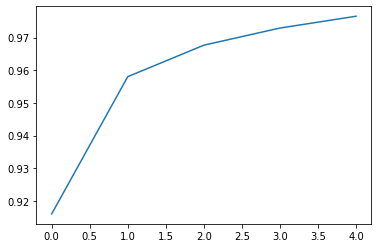

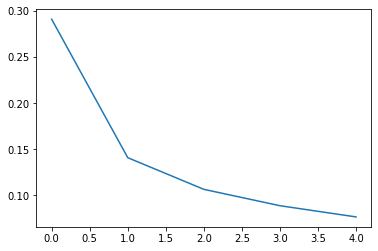

In [13]:
acc_curve = history.history['accuracy']
loss_curve = history.history['loss']
plt.plot(acc_curve,label='accuracy')
plt.show()
plt.plot(loss_curve,label='loss')
plt.show()


## [Problème 2] (Tâche avancée) Exécuter diverses méthodes


![No Maintenance Intended](https://img.shields.io/badge/No%20Maintenance%20Intended-%E2%9C%95-red.svg)
[![TensorFlow 1.15.3](https://img.shields.io/badge/TensorFlow-1.15.3-FF6F00?logo=tensorflow)](https://github.com/tensorflow/tensorflow/releases/tag/v1.15.3)
[![TensorFlow 2.3](https://img.shields.io/badge/TensorFlow-2.3-FF6F00?logo=tensorflow)](https://github.com/tensorflow/tensorflow/releases/tag/v2.3.0)

# DeepSpeech2 Model

## Overview
This is an implementation of the [DeepSpeech2](https://arxiv.org/pdf/1512.02595.pdf) model. Current implementation is based on the code from the authors' [DeepSpeech code](https://github.com/PaddlePaddle/DeepSpeech) and the implementation in the [MLPerf Repo](https://github.com/mlperf/reference/tree/master/speech_recognition).

DeepSpeech2 is an end-to-end deep neural network for automatic speech
recognition (ASR). It consists of 2 convolutional layers, 5 bidirectional RNN
layers and a fully connected layer. The feature in use is linear spectrogram
extracted from audio input. The network uses Connectionist Temporal Classification [CTC](https://www.cs.toronto.edu/~graves/icml_2006.pdf) as the loss function.

## Dataset
The [OpenSLR LibriSpeech Corpus](http://www.openslr.org/12/) are used for model training and evaluation.

The training data is a combination of train-clean-100 and train-clean-360 (~130k
examples in total). The validation set is dev-clean which has 2.7K lines.
The download script will preprocess the data into three columns: wav_filename,
wav_filesize, transcript. data/dataset.py will parse the csv file and build a
tf.data.Dataset object to feed data. Within each epoch (except for the
first if sortagrad is enabled), the training data will be shuffled batch-wise.


## [Problème 3] Apprendre Iris (classification binaire) avec Keras


In [16]:
df_init = load_iris()
df = pd.DataFrame(df_init.data,columns=df_init.feature_names)
target_df = pd.DataFrame(df_init.target,columns=["species"])

df = pd.concat([df,target_df], axis=1)
df = df.loc[(df.species==1) | (df.species==2)]
X = X = df.loc[:, ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df['species']

X = np.array(X)
y = np.array(y)

y[y == 1] = 0
y[y == 2] = 1

y = y.astype(np.int64)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

## construction du model

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation = "linear", input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

#summary 
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               500       
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,701
Trainable params: 10,701
Non-trainable params: 0
_________________________________________________________________


## compilation

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Entrainement

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 33ms/step - loss: 3.3757 - accuracy: 0.3594 - val_loss: 1.6704 - val_accuracy: 0.3750
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 1.4304 - accuracy: 0.5625 - val_loss: 0.5817 - val_accuracy: 0.6250
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.7179 - accuracy: 0.6094 - val_loss: 0.7747 - val_accuracy: 0.3750
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6358 - accuracy: 0.5469 - val_loss: 0.4425 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 0.5884 - accuracy: 0.6406 - val_loss: 0.4061 - val_accuracy: 0.9375
Epoch 6/10
7/7 [==============================] - 0s 9ms/step - loss: 0.6276 - accuracy: 0.6406 - val_loss: 0.5670 - val_accuracy: 0.5625
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3949 - accuracy: 0.8750 - val_loss: 0.3863 - val_accuracy: 0.8125
Epoch 8/10
7/7 [================

#### Predict

In [33]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

y_pred_proba [0.16443983 0.96936655 0.15432611 0.9619438  0.77942705 0.9634162
 0.46461892 0.71401644 0.9726126  0.8804794  0.91487026 0.93391824
 0.9625533  0.32647455 0.0772838  0.1153731  0.57469285 0.06992677
 0.7969248  0.09913191]
y_pred [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
y_test [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


#### Evaluation

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.2620052695274353
Train accuracy: 0.8999999761581421


## [Problème 4] Apprendre Iris (classification multi-valeurs) avec Keras


In [45]:
df_init = load_iris()
df = pd.DataFrame(df_init.data,columns=df_init.feature_names)
target_df = pd.DataFrame(df_init.target,columns=["species"])

df = pd.concat([df,target_df], axis=1)
X = X = df.loc[:, ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df['species']

X = np.array(X)
y = np.array(y)

y = y.astype(np.int64)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train)
y_val_one_hot = enc.transform(y_val)
y_test_one_hot = enc.transform(y_test)

In [53]:
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = "relu", input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(3, activation = "softmax"))

#summary 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot,
                    batch_size=10,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_val, y_val_one_hot))

#### Prredict

In [56]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

y_pred_proba [8.1791801e-10 4.4664396e-03 9.9999297e-01 8.8781329e-09 9.9993253e-01
 1.1996385e-11 9.9996245e-01 6.9373276e-04 3.3363959e-04 8.3846608e-03
 9.2578368e-08 1.4486031e-03 3.1869451e-04 3.6615107e-04 1.7841918e-04
 9.9996424e-01 2.8327873e-04 2.6490289e-04 9.9985504e-01 9.9998665e-01
 7.0993948e-08 1.5373743e-04 9.9970478e-01 9.9973565e-01 1.4547801e-05
 9.9997962e-01 9.9984431e-01 2.7891493e-03 3.4684744e-02 9.9986875e-01]
y_pred [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [57]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

y_pred [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


#### Evaluation

In [55]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.10074906051158905
Train accuracy: 0.9666666388511658


### [Problème 5] Apprenez les prix des maisons avec Keras


In [59]:
#import data
dataset_path ="/content/train.csv"
df = pd.read_csv(dataset_path)

y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.array(y)
X = np.array(X)
y = y.astype(np.int)[:, np.newaxis]
y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
K.clear_session( )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [61]:
#model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = "relu", input_shape=(2,)))
model.add(tf.keras.layers.Dense(50, activation = "softmax", input_shape=(2,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = "linear"))

# summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                150       
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,901
Trainable params: 7,901
Non-trainable params: 0
_________________________________________________________________


###E Entrainement

In [62]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['mse'])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=20,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/20
94/94 [==============================] - 1s 5ms/step - loss: 16.9265 - mse: 16.9265 - val_loss: 0.1797 - val_mse: 0.1797
Epoch 2/20
94/94 [==============================] - 0s 3ms/step - loss: 0.1675 - mse: 0.1675 - val_loss: 0.1653 - val_mse: 0.1653
Epoch 3/20
94/94 [==============================] - 0s 3ms/step - loss: 0.1679 - mse: 0.1679 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 4/20
94/94 [==============================] - 0s 4ms/step - loss: 0.1701 - mse: 0.1701 - val_loss: 0.1671 - val_mse: 0.1671
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.1658 - mse: 0.1658 - val_loss: 0.1561 - val_mse: 0.1561
Epoch 6/20
94/94 [==============================] - 0s 3ms/step - loss: 0.1698 - mse: 0.1698 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 7/20
94/94 [==============================] - 0s 4ms/step - loss: 0.1773 - mse: 0.1773 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 8/20
94/94 [==============================] - 0s 3ms/step - loss: 0.1746 - mse: 0.

#### Prediction

In [63]:
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba
print("y_pred", y_pred.ravel()[:5])
print('y_test', y_test.ravel()[:5])

y_pred [12.176381 12.176381 12.176381 12.176381 12.176381]
y_test [12.20918779 11.79810441 11.60823564 12.16525065 11.38509209]


#### evaluation

In [65]:
score = model.evaluate(X_test, y_test, verbose=0)
print('loss (test):', score[0])
print('Mean Squared Error (test):', score[1])

loss (test): 0.17376455664634705
Mean Squared Error (test): 0.17376455664634705


## [Problème 6] Apprendre MNIST avec Keras


In [68]:
## import data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

K.clear_session( )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [70]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = "relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

# summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 100)               5100      
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


#### compilation et prediction

In [71]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, y_val_one_hot))

Epoch 1/5
2400/2400 [==============================] - 10s 4ms/step - loss: 0.2914 - accuracy: 0.9134 - val_loss: 0.2018 - val_accuracy: 0.9388
Epoch 2/5
2400/2400 [==============================] - 14s 6ms/step - loss: 0.1875 - accuracy: 0.9468 - val_loss: 0.1738 - val_accuracy: 0.9500
Epoch 3/5
2400/2400 [==============================] - 19s 8ms/step - loss: 0.1563 - accuracy: 0.9541 - val_loss: 0.1715 - val_accuracy: 0.9530
Epoch 4/5
2400/2400 [==============================] - 8s 3ms/step - loss: 0.1446 - accuracy: 0.9587 - val_loss: 0.2183 - val_accuracy: 0.9420
Epoch 5/5
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1315 - accuracy: 0.9625 - val_loss: 0.1535 - val_accuracy: 0.9580


In [72]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred[:10])
print('y_test', y_test.ravel()[:10])

y_pred [7 2 1 0 4 1 4 9 5 9]
y_test [7 2 1 0 4 1 4 9 5 9]


In [73]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1664295643568039
Test accuracy: 0.9577000141143799


## [Problème 7] (Tâche avancée) Réécriture vers PyTorch


In [74]:
#import data
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [75]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



The torchvision.datasets module contains Dataset objects for many real-world vision data like CIFAR, COCO (full list here). In this tutorial, we use the FashionMNIST dataset. Every TorchVision Dataset includes two arguments: transform and target_transform to modify the samples and labels respectively.

In [76]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


#### Creating Models


In [77]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


#### Optimizing the Model Parameters


In [78]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Dans une seule boucle d'apprentissage, le modèle fait des prédictions sur l'ensemble des données d'apprentissage (qui lui sont fournies par lots), et la rétro-propagation de l'erreur de prédiction pour ajuster les paramètres du modèle.

In [79]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Nous vérifions également les performances du modèle par rapport à l'ensemble de données de test pour nous assurer qu'il apprend bien.



In [80]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Le processus d'apprentissage se déroule sur plusieurs itérations (époques). Au cours de chaque époque, le modèle apprend des paramètres pour faire de meilleures prédictions. Nous imprimons la précision et la perte du modèle à chaque époque ; nous aimerions voir la précision augmenter et la perte diminuer à chaque époque.





In [81]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309279  [    0/60000]
loss: 2.292878  [ 6400/60000]
loss: 2.277264  [12800/60000]
loss: 2.269037  [19200/60000]
loss: 2.253836  [25600/60000]
loss: 2.234430  [32000/60000]
loss: 2.246664  [38400/60000]
loss: 2.209099  [44800/60000]
loss: 2.205860  [51200/60000]
loss: 2.182976  [57600/60000]
Test Error: 
 Accuracy: 37.6%, Avg loss: 2.173651 

Epoch 2
-------------------------------
loss: 2.190419  [    0/60000]
loss: 2.169001  [ 6400/60000]
loss: 2.121071  [12800/60000]
loss: 2.129136  [19200/60000]
loss: 2.079254  [25600/60000]
loss: 2.031793  [32000/60000]
loss: 2.055491  [38400/60000]
loss: 1.973899  [44800/60000]
loss: 1.985775  [51200/60000]
loss: 1.916318  [57600/60000]
Test Error: 
 Accuracy: 50.1%, Avg loss: 1.912571 

Epoch 3
-------------------------------
loss: 1.953083  [    0/60000]
loss: 1.905753  [ 6400/60000]
loss: 1.804960  [12800/60000]
loss: 1.838851  [19200/60000]
loss: 1.726830  [25600/60000]
loss: 1.684675  [32000/600

#### Saving Models


In [82]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


#### Loading Models


In [83]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [84]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


## [Problème 8] (Tâche avancée) Comparaison des frameworks


**TensorFlow** est une bibliothèque d'apprentissage profond très puissante et mature, dotée de fortes capacités de visualisation et de plusieurs options à utiliser pour le développement de modèles de haut niveau. Elle dispose d'options de déploiement prêtes pour la production et prend en charge les plateformes mobiles. TensorFlow est une bonne option si vous :
- Développez des modèles destinés à la production.
- Développez des modèles qui doivent être déployés sur des plateformes mobiles
-  souhaitez bénéficier d'un bon support communautaire et d'une documentation complète
-  souhaitez disposer de ressources d'apprentissage riches sous diverses formes (TensorFlow dispose d'un MOOC complet)
-  voulez ou devez utiliser Tensorboard
Besoin d'utiliser la formation de modèles distribués à grande échelle

----
**PyTorch** est encore un jeune framework qui prend rapidement de l'ampleur. Il peut vous convenir si vous.. :
- vous faites de la recherche ou les exigences non fonctionnelles de votre production ne sont pas très élevées
- Vous voulez une meilleure expérience de développement et de débogage
- Vous aimez tout ce qui est Python